![evaluation_1](pics/evaluation_1.png)

![evaluation_2](pics/evaluation_2.png)

![evaluation_2](pics/evaluation_3.png)
![evaluation_2](pics/evaluation_4.png)
![evaluation_2](pics/evaluation_5.png)


In [3]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Import the train test split
# http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html
from sklearn.model_selection import train_test_split

# Read the data.
data = np.asarray(pd.read_csv('data/data_eval.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TODO: Create the decision tree model and assign it to the variable model.
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model.fit(X_train,y_train)

# TODO: Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc. on the test data
acc = accuracy_score(y_test, y_pred)

print(acc)

0.9583333333333334


## Confusion Matrix

![confusion](pics/confusion.png)

### Confusion Matrix Quiz

How many True Positives, True Negatives, False Positives, and False Negatives, are in the model above? Please enter your answer in that order, as four numbers separated by a comma and a space. For example, if your answers are 1, 2, 3, and 4, enter the string 1, 2, 3, 4.

Remember, in the image above the blue points are considered positives and the red points are considered negatives.

6, 5, 2, 1

### Type 1 and Type 2 Errors

Sometimes in the literature, you'll see False Positives and False Negatives as Type 1 and Type 2 errors. Here is the correspondence:

* **Type 1 Error (Error of the first kind, or False Positive)**: In the medical example, this is when we misdiagnose a healthy patient as sick.
* **Type 2 Error (Error of the second kind, or False Negative)**: In the medical example, this is when we misdiagnose a sick patient as healthy.

![eval_acc.png](pics/eval_acc.png)

### Quiz Accuracy

![accuracy-quiz.png](pics/accuracy-quiz.png)

What is the accuracy of the model above? Please enter the answer as a percentage, with two decimals.



In [5]:
acc = (6 + 5)/ (6 + 5 + 2 + 1)
print(acc*100)

78.57142857142857


When accuracy won't work

![eval_acc2](pics/eval_acc_2.png)

![eval_acc2](pics/eval_acc_3.png)


## False Negatives and Positives

![False Negatives and Positives](pics/medical.png)

**Quiz**

In the medical example, what is worse, a False Positive, or a False Negative?

**Answer**

A False Positive implies sending a healthy person to get more tests. This is slightly inconvenient, but ok. A False Negative implies sending a sick person home, which can be disastrous!

![email.png](pics/email.png)

**Quiz**

In the spam detector example, what is worse, a False Positive, or a False Negative?

A **False Negative**. A False Negative implies a spam message will make its way into your inbox. This is slightly inconvenient, but ok. A False Positive implies missing an e-mail from your dear grandma, which can be disastrous!

![high_prec_recall.png](pics/high_prec_recall.png)

## Precision

![precision.png](pics/precision.png)

![precision.png](pics/precision_1.png)

**Precision Quiz**

![precision-quiz.png](pics/precision-quiz.png)

In this image, the blue points are labelled positive, and the red points are labelled negative. Furthermore, the points on top of the line are predicted to be positive, and the points below the line are predicted to be negative.


![precision-answer.png](pics/precision-answer.png)

## Recall


![recall](pics/recall.png)

![recall-quiz.png](pics/recall-quiz.png)

In this image, the blue points are labelled positive, and the red points are labelled negative. Furthermore, the points on top of the line are predicted to be positive, and the points below the line are predicted to be negative. Note: This image has one extra

![recall-answer.png](pics/recall-answer.png)



## F1 Score

![f1_score_1.png](pics/f1_score_1.png)

What is the average if we classify all the credict card transactions as valid? 
![f1_score_2.png](pics/f1_score_2.png)

Average is 50%, but we don't like to give such a high average for 0% recall. 

Let's try now to classify all the transactions as fraudulent.

![f1_score_2.png](pics/f1_score_3.png)

So, average is not the greatest thing in principle if precision or recall are close to zero. So here is a solution. We will use the **harmonic mean** instead of the average. 

![f1_score_4.png](pics/f1_score_4.png)

There's actually just one quiz to do here, not two.

**F1 Score Quiz**
For the following, remember that the formula for F1 Score is:

$$\text{F1 Score} = 2 \cdot \frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}$$


If the Precision of the medical model is 55.6%, and the Recall is 83.3%, what is the F1 Score? (Please write your answer as a percentage, and round it to 1 decimal point.)



In [3]:
f1_score = 2 * (0.556 * 0.833) / (0.556 + 0.833) 
print(f1_score)

0.6668797696184305


## F-beta score

F-beta is a more genaralized score where we give a weight on which between precision and recall we want to focus on. It is not exact science but it requires intuition on which metric is the most important for us. 

![f_beta_1.png](pics/f_beta_1.png)

**Quiz** 

![fbeta.png](pics/fbeta.png)

Out of the following three models, which one should have an F-beta score of 2, 1, and 0.5? Match each model with its corresponding score.

* Detecting malfunctioning parts in a spaceship
* Sending phone notifications about videos a user may like
* Sending promotional material in the mail to potential clients

**Solution** 

* For the spaceship model, we can't really afford any malfunctioning parts, and it's ok if we overcheck some of the parts that are working well. Therefore, this is a **high recall** model, so we associate it with **beta = 2**.
* For the notifications model, since it's free to send them, we won't get harmed too much if we send them to more people than we need to. But we also **shouldn't overdo it**, since it will annoy the users. We also would like to find as many interested users as we can. Thus, this is a model which should have a **decent precision and a decent recall**. **Beta = 1** should work here.
* For the Promotional Material model, since it costs us to send the material, we really don't want to send it to many people that won't be interested. Thus, this is a **high precision** model. Thus, **beta = 0.5** will work here.

### Boundaries in the F-beta score
Note that in the formula for $F_\beta$ score, if we set $\beta = 0$, we get

$F_0 = (1+0^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{0 \cdot \text{Precision} + \text{Recall}} = \frac{\text{Precision} \cdot \text{Recall}}{\text{Recall}} = \text{Precision}$. Therefore, the minimum value of $\beta$ is zero, and at this value, we get the precision.

Now, notice that if $N$ is really large, then

$F_\beta = (1+N^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{N^2 \cdot \text{Precision} + \text{Recall}} = \frac{\text{Precision} \cdot \text{Recall}}{\frac{N^2}{1+N^2}\text{Precision} + \frac{1}{1+N^2}\text{Recall}}$.

As $N$ goes to infinity, we can see that $\frac{1}{1+N^2}$ goes to zero, and $\frac{N^2}{1+N^2}$ goes to 1.

Therefore, if we take the limit, we have

${\lim_{N\rightarrow \infty}} F_N = \frac{\text{Precision} \cdot \text{Recall}}{1 \cdot \text{Precision} + 0 \cdot \text{Recall}} = \text{Recall}$.

Thus, to conclude, the boundaries of beta are between 0 and $\infty$.

If $\beta = 0$, then we get **precision**.
If $\beta = \infty$, then we get **recall**.
For other values of $\beta$, if they are close to 0, we get something close to precision, if they are large numbers, then we get something close to recall, and if $\beta = 1$, then we get the **harmonic mean of precision and recall**.

## Receiver Operating Characteristic (ROC)

![roc_1.png](pics/roc_1.png)

We want a measure to give us the scores above. 

![roc_2](pics/roc_2.png)
![roc_2](pics/roc_3.png)
![roc_2](pics/roc_4.png)

![roc_2](pics/roc_5.png)

Can the are be the area under the curve be less than 0.5? - Yes

## SKlearn practise (Classification)

In this lesson you gained some insight into a number of techniques used to understand how well our model is performing.  This notebook is aimed at giving you some practice with the metrics specifically related to classification problems.  With that in mind, we will again be looking at the spam dataset from the earlier lessons.

First, run the cell below to prepare the data and instantiate a number of different models.

In [4]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import tests as t

# Read in our dataset
df = pd.read_table('data/SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Instantiate a number of our models
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

> **Step 1**: Now, fit each of the above models to the appropriate data.  Answer the following question to assure that you fit the models correctly.

In [5]:
# Fit each of the 4 models
# This might take some time to run

naive_bayes.fit(training_data, y_train)
bag_mod.fit(training_data, y_train)
rf_mod.fit(training_data, y_train)
ada_mod.fit(training_data, y_train)
svm_mod.fit(training_data, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

> **Step 2**: Now make predictions for each of your models on the data that will allow you to understand how well our model will extend to new data.  Then correctly add the strings to the set in the following cell.

In [22]:
# Make predictions using each of your models

preds_nb = naive_bayes.predict(testing_data)
preds_bag = bag_mod.predict(testing_data)
preds_rf = rf_mod.predict(testing_data)
preds_ada = ada_mod.predict(testing_data)
preds_svm = svm_mod.predict(testing_data)

Now that you have set up all your predictions, let's get to topics addressed in this lesson - measuring how well each of your models performed. First, we will focus on how each metric was calculated for a single model, and then in the final part of this notebook, you will choose models that are best based on a particular metric.

You will be writing functions to calculate a number of metrics and then comparing the values to what you get from sklearn.  This will help you build intuition for how each metric is calculated.

> **Step 3**: As an example of how this will work for the upcoming questions, run the cell below.  Fill in the below function to calculate accuracy, and then compare your answer to the built in to assure you are correct.

In [8]:
# accuracy is the total correct divided by the total to predict
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy arrayNow that you have set up all your predictions, let's get to topics addressed in this lesson - measuring how well each of your models performed. First, we will focus on how each metric was calculated for a single model, and then in the final part of this notebook, you will choose models that are best based on a particular metric.

You will be writing functions to calculate a number of metrics and then comparing the values to what you get from sklearn.  This will help you build intuition for how each metric is calculated.

> **Step 3**: As an example of how this will work for the upcoming questions, run the cell below.  Fill in the below function to calculate accuracy, and then compare your answer to the built in to assure you are correct. or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the accuracy as a float
    '''
    return np.sum(preds == actual)/len(actual)


print(accuracy(y_test, preds_nb))
print(accuracy_score(y_test, preds_nb))
print("Since these match, we correctly calculated our metric!")

0.9885139985642498
0.9885139985642498
Since these match, we correctly calculated our metric!


> **Step 4**: Fill in the below function to calculate precision, and then compare your answer to the built in to assure you are correct.

In [11]:
# precision is the true positives over the predicted positive values
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 1 and negative = 0)
    preds - predictions as a numpy array or pandas series 
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the precision as a float
    '''
    
    #  tp / (tp + fp)
    
    precision = np.sum((preds == actual) & (preds == 1))/np.sum(preds == 1)
    
    return precision

print(precision(y_test, preds_nb))
print(precision_score(y_test, preds_nb))
print("If the above match, you got it!")

0.9720670391061452
0.9720670391061452
If the above match, you got it!


> **Step 5**: Fill in the below function to calculate recall, and then compare your answer to the built in to assure you are correct.

In [12]:
# recall is true positives over all actual positive values
def recall(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the recall as a float
    '''
    #  tp / (tp + fn)
    
    recall = np.sum((preds == actual) & (preds == 1))/np.sum(actual == 1)
    return recall # calculate recall here


print(recall(y_test, preds_nb))
print(recall_score(y_test, preds_nb))
print("If the above match, you got it!")

0.9405405405405406
0.9405405405405406
If the above match, you got it!


> **Step 6**: Fill in the below function to calculate f1-score, and then compare your answer to the built in to assure you are correct.

In [14]:
# f1_score is 2*(precision*recall)/(precision+recall))
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the f1score as a float
    '''
    
    precision = np.sum((preds == actual) & (preds == 1))/np.sum(preds == 1)
    recall = np.sum((preds == actual) & (preds == 1))/np.sum(actual == 1)
    f1_score = 2*(precision*recall)/(precision+recall)
    return f1_score # calculate f1-score here


print(f1(y_test, preds_nb))
print(f1_score(y_test, preds_nb))
print("If the above match, you got it!")

0.9560439560439562
0.9560439560439562
If the above match, you got it!


> **Step 7:** Now that you have calculated a number of different metrics, let's tie that to when we might use one versus another.  Use the dictionary below to match a metric to each statement that identifies when you would want to use that metric.

In [17]:
a = "recall"
b = "precision"
c = "accuracy"
d = 'f1-score'


seven_sol = {
c: 'We have imbalanced classes, which metric do we definitely not want to use?',
a: 'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives',    
b: 'When we identify something as positive, we want to be sure it is truly positive', 
d: 'We care equally about identifying positive and negative cases'   
}

seven_sol


{'accuracy': 'We have imbalanced classes, which metric do we definitely not want to use?',
 'recall': 'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives',
 'precision': 'When we identify something as positive, we want to be sure it is truly positive',
 'f1-score': 'We care equally about identifying positive and negative cases'}

> **Step 8:** Given what you know about the metrics now, use this information to correctly match the appropriate model to when it would be best to use each in the dictionary below.

In [18]:
# use the answers you found to the previous questiona, then match the model that did best for each metric
a = "naive-bayes"
b = "bagging"
c = "random-forest"
d = 'ada-boost'
e = "svm"


eight_sol = {
'We have imbalanced classes, which metric do we definitely not want to use?': a,
'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': a,    
'When we identify something as positive, we want to be sure it is truly positive': c, 
'We care equally about identifying positive and negative cases': a  
}

eight_sol

{'We have imbalanced classes, which metric do we definitely not want to use?': 'naive-bayes',
 'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': 'naive-bayes',
 'When we identify something as positive, we want to be sure it is truly positive': 'random-forest',
 'We care equally about identifying positive and negative cases': 'naive-bayes'}

In [24]:

def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if model_name == None:
        print('Accuracy score: ', format(accuracy_score(y_true, preds)))
        print('Precision score: ', format(precision_score(y_true, preds)))
        print('Recall score: ', format(recall_score(y_true, preds)))
        print('F1 score: ', format(f1_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
        print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
        print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
        print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
        print('\n\n')

In [25]:
# Print Bagging scores
print_metrics(y_test, preds_bag, 'bagging')

# Print Random Forest scores
print_metrics(y_test, preds_rf, 'random forest')

# Print AdaBoost scores
print_metrics(y_test, preds_ada, 'adaboost')

# Naive Bayes Classifier scores
print_metrics(y_test, preds_nb, 'naive bayes')

# SVM Classifier scores
print_metrics(y_test, preds_svm, 'svm')


Accuracy score for bagging : 0.9748743718592965
Precision score bagging : 0.9166666666666666
Recall score bagging : 0.8918918918918919
F1 score bagging : 0.9041095890410958



Accuracy score for random forest : 0.9791816223977028
Precision score random forest : 1.0
Recall score random forest : 0.8432432432432433
F1 score random forest : 0.9149560117302054



Accuracy score for adaboost : 0.9770279971284996
Precision score adaboost : 0.9693251533742331
Recall score adaboost : 0.8540540540540541
F1 score adaboost : 0.9080459770114943



Accuracy score for naive bayes : 0.9885139985642498
Precision score naive bayes : 0.9720670391061452
Recall score naive bayes : 0.9405405405405406
F1 score naive bayes : 0.9560439560439562



Accuracy score for svm : 0.9849246231155779
Precision score svm : 0.9939759036144579
Recall score svm : 0.8918918918918919
F1 score svm : 0.9401709401709402





As a final step in this workbook, let's take a look at the last three metrics you saw, f-beta scores, ROC curves, and AUC.

**For f-beta scores:** If you decide that you care more about precision, you should move beta closer to 0.  If you decide you care more about recall, you should move beta towards infinity. 

> **Step 9:** Using the fbeta_score works similar to most of the other metrics in sklearn, but you also need to set beta as your weighting between precision and recall.  Use the space below to show that you can use [fbeta in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html) to replicate your f1-score from above.  If in the future you want to use a different weighting, [this article](http://mlwiki.org/index.php/Precision_and_Recall) does an amazing job of explaining how you might adjust beta for different situations.

In [26]:
#import fbeta score
from sklearn.metrics import fbeta_score

#show that the results are the same for fbeta and f1_score
print(fbeta_score(y_test, preds_bag, beta=1))
print(f1_score(y_test, preds_bag))

0.9041095890410958
0.9041095890410958


> **Step 10:** Building ROC curves in python is a pretty involved process on your own.  I wrote the function below to assist with the process and make it easier for you to do so in the future as well.  Try it out using one of the other classifiers you created above to see how it compares to the random forest model below.

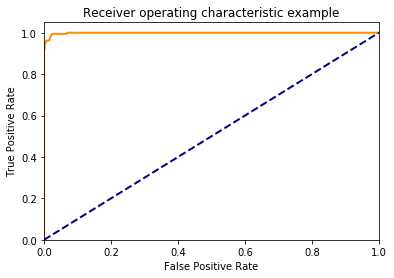

0.9351351351351351

In [29]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    stuff 
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))
    
    
# Finding roc and auc for the random forest model    
build_roc_auc(rf_mod, training_data, testing_data, y_train, y_test)    

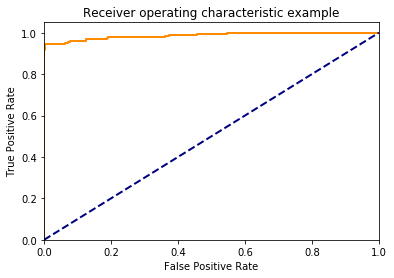

0.9682007338464294

In [30]:
# Your turn here - choose another classifier to see how it compares

build_roc_auc(naive_bayes, training_data, testing_data, y_train, y_test) 

## Regression Metrics 

![mae_1.png](pics/mae_1.png)
![mse_1.png](pics/mse_1.png)

![r2_sqr_1.png](pics/r2_sqr_1.png)
![r2_sqr_1.png](pics/r2_sqr_2.png)

##  Regression Metrics Sklearn

In order to gain a better understanding of the metrics used in regression settings, we will be looking at the Boston Housing dataset.  

First use the cell below to read in the dataset and set up the training and testing data that will be used for the rest of this problem.

In [32]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np

boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)

> **Step 1:** Before we get too far, let's do a quick check of the models that you can use in this situation given that you are working on a regression problem.  Use the dictionary and corresponding letters below to provide all the possible models you might choose to use.

In [34]:
# When can you use the model - use each option as many times as necessary
a = 'regression'
b = 'classification'
c = 'both regression and classification'

models = {
    'decision trees': c,
    'random forest': c,
    'adaptive boosting': c,
    'logistic regression': b,
    'linear regression': a
}

models

{'decision trees': 'both regression and classification',
 'random forest': 'both regression and classification',
 'adaptive boosting': 'both regression and classification',
 'logistic regression': 'classification',
 'linear regression': 'regression'}

> **Step 2:** Now for each of the models you found in the previous question that can be used for regression problems, import them using sklearn.


In [35]:
# Import models from sklearn - notice you will want to use 
# the regressor version (not classifier) - googling to find 
# each of these is what we all do!

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

> **Step 3:** Now that you have imported the 4 models that can be used for regression problems, instantate each below.

In [36]:
# Instantiate each of the models you imported
# For now use the defaults for all the hyperparameters

tree_mod = DecisionTreeRegressor()
rf_mod = RandomForestRegressor()
ada_mod = AdaBoostRegressor()
reg_mod = LinearRegression()

> **Step 4:** Fit each of your instantiated models on the training data.

In [37]:
# Fit each of your models using the training data
tree_mod.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
ada_mod.fit(X_train, y_train)
reg_mod.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> **Step 5:** Use each of your models to predict on the test data.

In [38]:
# Predict on the test values for each model

preds_tree = tree_mod.predict(X_test) 
preds_rf = rf_mod.predict(X_test)
preds_ada = ada_mod.predict(X_test)
preds_reg = reg_mod.predict(X_test)

> **Step 6:** Now for the information related to this lesson.  Use the dictionary to match the metrics that are used for regression and those that are for classification.

In [40]:
# potential model options
a = 'regression'
b = 'classification'
c = 'both regression and classification'

#
metrics = {
    'precision': b,
    'recall': b,
    'accuracy': b,
    'r2_score': a,
    'mean_squared_error': a,
    'area_under_curve': b, 
    'mean_absolute_area': a 
}

#checks your answer, no need to change this code
metrics

{'precision': 'classification',
 'recall': 'classification',
 'accuracy': 'classification',
 'r2_score': 'regression',
 'mean_squared_error': 'regression',
 'area_under_curve': 'classification',
 'mean_absolute_area': 'regression'}

> **Step 6:** Now that you have identified the metrics that can be used in for regression problems, use sklearn to import them.

In [41]:
# Import the metrics from sklearn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


> **Step 7:** Similar to what you did with classification models, let's make sure you are comfortable with how exactly each of these metrics is being calculated.  We can then match the value to what sklearn provides.

In [42]:
def r2(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the r-squared score as a float
    '''
    sse = np.sum((actual-preds)**2)
    sst = np.sum((actual-np.mean(actual))**2)
    return 1 - sse/sst

# Check solution matches sklearn
print(r2(y_test, preds_tree))
print(r2_score(y_test, preds_tree))
print("Since the above match, we can see that we have correctly calculated the r2 value.")

0.7614443872852865
0.7614443872852865
Since the above match, we can see that we have correctly calculated the r2 value.


> **Step 8:** Your turn fill in the function below and see if your result matches the built in for mean_squared_error. 

In [43]:
def mse(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean squared error as a float
    '''
    
    return np.sum((actual-preds)**2)/len(actual)


# Check your solution matches sklearn
print(mse(y_test, preds_tree))
print(mean_squared_error(y_test, preds_tree))
print("If the above match, you are all set!")

18.053532934131734
18.053532934131734
If the above match, you are all set!


> **Step 9:** Now one last time - complete the function related to mean absolute error.  Then check your function against the sklearn metric to assure they match. 

In [44]:
def mae(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean absolute error as a float
    '''
    
    return np.sum(np.abs(actual-preds))/len(actual)

# Check your solution matches sklearn
print(mae(y_test, preds_tree))
print(mean_absolute_error(y_test, preds_tree))
print("If the above match, you are all set!")

2.9209580838323355
2.9209580838323355
If the above match, you are all set!


> **Step 10:** Which model performed the best in terms of each of the metrics?  Note that r2 and mse will always match, but the mae may give a different best model.  Use the dictionary and space below to match the best model via each metric.

In [45]:
#match each metric to the model that performed best on it
a = 'decision tree'
b = 'random forest'
c = 'adaptive boosting'
d = 'linear regression'


best_fit = {
    'mse': b,
    'r2': b,
    'mae': b
}

best_fit

{'mse': 'random forest', 'r2': 'random forest', 'mae': 'random forest'}

In [46]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the mse, mae, r2
    '''
    if model_name == None:
        print('Mean Squared Error: ', format(mean_squared_error(y_true, preds)))
        print('Mean Absolute Error: ', format(mean_absolute_error(y_true, preds)))
        print('R2 Score: ', format(r2_score(y_true, preds)))
        print('\n\n')
    
    else:
        print('Mean Squared Error ' + model_name + ' :' , format(mean_squared_error(y_true, preds)))
        print('Mean Absolute Error ' + model_name + ' :', format(mean_absolute_error(y_true, preds)))
        print('R2 Score ' + model_name + ' :', format(r2_score(y_true, preds)))
        print('\n\n')

In [47]:
# Print Decision Tree scores
print_metrics(y_test, preds_tree, 'tree')

# Print Random Forest scores
print_metrics(y_test, preds_rf, 'random forest')

# Print AdaBoost scores
print_metrics(y_test, preds_ada, 'adaboost')

# Linear Regression scores
print_metrics(y_test, preds_reg, 'linear reg')


Mean Squared Error tree : 18.053532934131734
Mean Absolute Error tree : 2.9209580838323355
R2 Score tree : 0.7614443872852865



Mean Squared Error random forest : 10.661786455089816
Mean Absolute Error random forest : 2.214359281437125
R2 Score random forest : 0.859117381085072



Mean Squared Error adaboost : 14.611887340546891
Mean Absolute Error adaboost : 2.7130067355861773
R2 Score adaboost : 0.8069215731812565



Mean Squared Error linear reg : 20.72402343733974
Mean Absolute Error linear reg : 3.1482557548168217
R2 Score linear reg : 0.7261570836552478





## Recap

In this lesson, you got a glimpse at the ways that we can measure how well our models are performing.

### Training & Testing Data
First, it is important to always split your data into training and testing. Then you will measure how well your model performs on the test set of data after being fit training data.

### Classification Measures
If you are fitting your model to predict categorical data (spam not spam), there are different measures to understand how well your model is performing than if you are predicting numeric values (the price of a home).

As we look at classification metrics, note that the wikipedia page on this topic is wonderful, but also a bit daunting. I frequently use it to remember which metric does what.

Specifically, you saw how to calculate:

### Accuracy
Accuracy is often used to compare models, as it tells us the proportion of observations we correctly labeled.

![screen-shot-2018-05-26-at-4.40.07-pm.png](pics/screen-shot-2018-05-26-at-4.40.07-pm.png)

Often accuracy is not the only metric you should be optimizing on. This is especially the case when you have class imbalance in your data. Optimizing on only accuracy can be misleading in how well your model is truly performing. With that in mind, you saw some additional metrics.

### Precision
Precision focuses on the predicted "positive" values in your dataset. By optimizing based on precision values, you are determining if you are doing a good job of predicting the positive values, as compared to predicting negative values as positive.

![screen-shot-2018-05-26-at-4.59.04-pm.png](pics/screen-shot-2018-05-26-at-4.59.04-pm.png)

### Recall
Recall focuses on the actual "positive" values in your dataset. By optimizing based on recall values, you are determining if you are doing a good job of predicting the positive values without regard of how you are doing on the actual negative values. If you want to perform something similar to recall on the actual 'negative' values, this is called specificity (TN / (TN + FP)).

![screen-shot-2018-05-26-at-4.45.34-pm.png](pics/screen-shot-2018-05-26-at-4.45.34-pm.png)

### F-Beta Score
In order to look at a combination of metrics at the same time, there are some common techniques like the F-Beta Score (where the F1 score is frequently used), as well as the ROC and AUC. You can see that the \betaβ parameter controls the degree to which precision is weighed into the F score, which allows precision and recall to be considered simultaneously. The most common value for beta is 1, as this is where you are finding the harmonic average between precision and recall.

![screen-shot-2018-05-26-at-7.04.15-pm.png](pics/screen-shot-2018-05-26-at-7.04.15-pm.png)

### ROC Curve & AUC
By finding different thresholds for our classification metrics, we can measure the area under the curve (where the curve is known as a ROC curve). Similar to each of the other metrics above, when the AUC is higher (closer to 1), this suggests that our model performance is better than when our metric is close to 0.

![screen-shot-2018-05-26-at-7.24.13-pm.png](pics/screen-shot-2018-05-26-at-7.24.13-pm.png)

You may end up choosing to optimize on any of these measures. I commonly end up using AUC or an F1 score in practice. However, there are always reason to choose one measure over another depending on your situation.

### Regression Measures
You want to measure how well your algorithms are performing on predicting numeric values? In these cases, there are three main metrics that are frequently used. mean absolute error, mean squared error, and r2 values.

As an important note, optimizing on the mean absolute error may lead to a different 'best model' than if you optimize on the mean squared error. However, optimizing on the mean squared error will always lead to the same 'best' model as if you were to optimize on the r2 value.

Again, if you choose a model with the best r2 value (the highest), it will also be the model that has the lowest (MSE). Choosing one versus another is based on which one you feel most comfortable explaining to someone else.

### Mean Absolute Error (MAE)
The first metric you saw was the mean absolute error. This is a useful metric to optimize on when the value you are trying to predict follows a skewed distribution. Optimizing on an absolute value is particularly helpful in these cases because outliers will not influence models attempting to optimize on this metric as much as if you use the mean squared error. The optimal value for this technique is the median value. When you optimize for the R2 value of the mean squared error, the optimal value is actually the mean.

![screen-shot-2018-05-26-at-7.53.22-pm.png](pics/screen-shot-2018-05-26-at-7.53.22-pm.png)

### Mean-Squared Error (MSE)
The mean squared error is by far the most used metric for optimization in regression problems. Similar to with MAE, you want to find a model that minimizes this value. This metric can be greatly impacted by skewed distributions and outliers. When a model is considered optimal via MAE, but not for MSE, it is useful to keep this in mind. In many cases, it is easier to actually optimize on MSE, as the a quadratic term is differentiable. However, an absolute value is not differentiable. This factor makes this metric better for gradient based optimization algorithms.

![screen-shot-2018-05-26-at-7.55.02-pm.png](pics/screen-shot-2018-05-26-at-7.55.02-pm.png)

### R2 Score
Finally, the r2 value is another common metric when looking at regression values. Optimizing a model to have the lowest MSE will also optimize a model to have the the highest R2 value. This is a convenient feature of this metric. The R2 value is frequently interpreted as the 'amount of variability' captured by a model. Therefore, you can think of MSE, as the average amount you miss by across all the points, and the R2 value as the amount of the variability in the points that you capture with a model.

![screen-shot-2018-05-26-at-7.55.22-pm.png](pics/screen-shot-2018-05-26-at-7.55.22-pm.png)

### Closing Words
This ends this lesson on metrics. In the final lesson before the project, you will get some practice tuning and optimizing your models.